<a href="https://colab.research.google.com/github/Xenonimous/MyBangkitCapstone/blob/master/MobileNetV2Model(Edited).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Checking Tensorflow version (Optional)


Before running the shell please make sure that you have changed Runtime 
Type into GPU



In [1]:
try:
    %tensorflow_version 2.x
except:
    pass

Importing Libraries

In [2]:
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import os
import numpy as np
import shutil
import random
from google.colab import files

print("\u2022 Using TensorFlow Version:", tf.__version__)

• Using TensorFlow Version: 2.7.0


Installing kaggle to colab

In [3]:
! pip install -q kaggle

Importing kaggle api (.json)

In [4]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rianm2482358","key":"041b05d8f835f38c3c492f0da9922584"}'}

Making kaggle directory

In [5]:
 ! mkdir ~/.kaggle
 ! cp kaggle.json ~/.kaggle/
 ! chmod 600 ~/.kaggle/kaggle.json

Downloading Garbage Classification dataset from kaggle

In [6]:
! kaggle datasets download -d asdasdasasdas/garbage-classification

 98% 80.0M/82.0M [00:00<00:00, 144MB/s]
100% 82.0M/82.0M [00:00<00:00, 150MB/s]


Unzipping the dataset into Google Colab

In [7]:
! unzip garbage-classification.zip -d temp
! mv temp/Garbage\ classification/Garbage\ classification .
! rm -r temp
! mv Garbage\ classification datasets



Streaming output truncated to the last 5000 lines.
  inflating: temp/Garbage classification/Garbage classification/cardboard/cardboard152.jpg  
  inflating: temp/Garbage classification/Garbage classification/cardboard/cardboard153.jpg  
  inflating: temp/Garbage classification/Garbage classification/cardboard/cardboard154.jpg  
  inflating: temp/Garbage classification/Garbage classification/cardboard/cardboard155.jpg  
  inflating: temp/Garbage classification/Garbage classification/cardboard/cardboard156.jpg  
  inflating: temp/Garbage classification/Garbage classification/cardboard/cardboard157.jpg  
  inflating: temp/Garbage classification/Garbage classification/cardboard/cardboard158.jpg  
  inflating: temp/Garbage classification/Garbage classification/cardboard/cardboard159.jpg  
  inflating: temp/Garbage classification/Garbage classification/cardboard/cardboard16.jpg  
  inflating: temp/Garbage classification/Garbage classification/cardboard/cardboard160.jpg  
  inflating: temp/Ga

Splitting Train, Test, and Validation dataset

In [8]:
#Download and Install split_folders package
! pip install split-folders

In [9]:
#Split datasets into new folder
import splitfolders
splitfolders.ratio('/content/datasets/', output="datasplit", seed=1337, ratio=(0.7, 0.15,0.15))

Copying files: 2527 files [00:00, 4745.45 files/s]


Generating data for training, testing, and validating

In [10]:
train_dir = '../content/datasplit/train/'
test_dir = '../content/datasplit/test/'
val_dir = '../content/datasplit/val/'

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale = 1./255.,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
    )

datagen = ImageDataGenerator(rescale = 1.0/255.)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size = 32,
    class_mode = 'categorical',
    target_size = (224, 224)
    )

test_generator = datagen.flow_from_directory(
    test_dir,
    batch_size = 32,
    class_mode = 'categorical',
    target_size = (224, 224)
    )

validation_generator = datagen.flow_from_directory(
    val_dir,
    batch_size = 32,
    class_mode = 'categorical',
    target_size = (224, 224)
    )

Found 1766 images belonging to 6 classes.
Found 384 images belonging to 6 classes.
Found 377 images belonging to 6 classes.


Transfer Learning : Inception V3

In [11]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from keras.callbacks import ModelCheckpoint, EarlyStopping

model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    'check_point_model.hdf5',
    verbose=1,
    save_best_only=True)

early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=10,
    verbose=1)

base_model = tf.keras.applications.MobileNetV2(
    input_shape = (224, 224, 3),
    include_top = False,
    weights = 'imagenet'
)

base_model.trainable = False

x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(512, activation="relu")(x)
predictions = tf.keras.layers.Dense(6, activation="softmax")(x)

model = tf.keras.models.Model(
    inputs=base_model.input,
    outputs=predictions
    )

model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
    )

history = model.fit(
    train_generator,
    validation_data = validation_generator,
    steps_per_epoch = 32,
    epochs = 100,
    verbose = 1,
    validation_steps = 5,
    callbacks=[model_checkpoint,early_stop]
    )

9420800/9406464 [==============================] - 0s 0us/step
Epoch 1/100
32/32 [==============================] - ETA: 0s - loss: 1.1258 - accuracy: 0.6032
Epoch 00001: val_loss improved from inf to 0.72610, saving model to check_point_model.hdf5


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


32/32 [==============================] - 49s 539ms/step - loss: 1.1258 - accuracy: 0.6032 - val_loss: 0.7261 - val_accuracy: 0.7250
Epoch 2/100
32/32 [==============================] - ETA: 0s - loss: 0.7020 - accuracy: 0.7375
Epoch 00002: val_loss improved from 0.72610 to 0.59728, saving model to check_point_model.hdf5
32/32 [==============================] - 17s 515ms/step - loss: 0.7020 - accuracy: 0.7375 - val_loss: 0.5973 - val_accuracy: 0.7563
Epoch 3/100
32/32 [==============================] - ETA: 0s - loss: 0.6524 - accuracy: 0.7675
Epoch 00003: val_loss did not improve from 0.59728
32/32 [==============================] - 16s 496ms/step - loss: 0.6524 - accuracy: 0.7675 - val_loss: 0.6466 - val_accuracy: 0.7375
Epoch 4/100
32/32 [==============================] - ETA: 0s - loss: 0.5327 - accuracy: 0.8166
Epoch 00004: val_loss did not improve from 0.59728
32/32 [==============================] - 16s 497ms/step - loss: 0.5327 - accuracy: 0.8166 - val_loss: 0.6738 - val_accurac

Save model

In [12]:
model.save('mobilenetv2_model.h5')
# tf.saved_model.save(model,'../content/')

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


Evaluate the model

In [13]:
model.evaluate(test_generator, steps = 10)

10/10 [==============================] - 2s 155ms/step - loss: 0.5520 - accuracy: 0.7906


[0.551963210105896, 0.7906249761581421]

Model Summary

In [14]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

Accuracy and Loss Plot

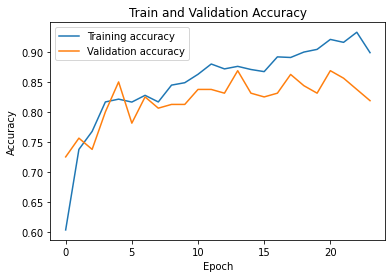

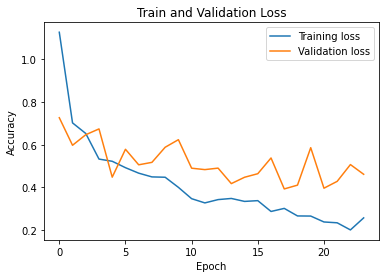

In [15]:
#Accuracy plot
plt.title("Train and Validation Accuracy")
plt.plot(history.history["accuracy"])
plt.plot(history.history['val_accuracy'])
plt.legend(["Training accuracy","Validation accuracy"])
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

#Loss plot
plt.title("Train and Validation Loss")
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(["Training loss","Validation loss"])
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

Test the model

Saving plastic.jpg to plastic (1).jpg


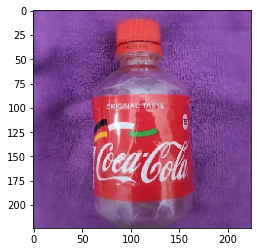

Cardboard: 0.03%
Glass: 18.76%
Metal: 4.96%
Paper: 0.05%
Plastic: 75.99%
Trash: 0.22%


In [22]:
from keras_preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

uploaded = files.upload()
labels = train_generator.class_indices.keys()

for name in uploaded.keys():
    path = name
    img = image.load_img(path, target_size=(224, 224))
    plt.imshow(img)
    plt.show()
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    images = np.vstack([x])
    probability = model.predict(images)[0]
    for (label, p) in zip(labels, probability):
        print("{}: {:.2f}%".format(label.capitalize(), p * 100))


Checking Model Size (Optional)

In [23]:
print (str(os.path.getsize('mobilenetv2_model.h5')/1024**2) + ' MB')

16.626365661621094 MB


In [24]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('mobilenetv2_model.tflite', 'wb') as f:
  f.write(tflite_model)

# saved_model_dir = '../content/'
# converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
# tflite_model = converter.convert()

# with open('saved_model.tflite', 'wb') as f:
#   f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpbu__e_f3/assets


In [25]:
print (str(os.path.getsize('mobilenetv2_model.tflite')/1024**2) + ' MB')

10.962276458740234 MB


In [26]:
new_model = tf.keras.models.load_model('mobilenetv2_model.h5')
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             